# Importing Libraries

**NOTE: *Dataset Private hai, apna khud ka seperate train test mein upload karke aur path change karke run kar sakte ho***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import pickle
import os
import time
from numpy.linalg import norm

from sklearn.neighbors import NearestNeighbors
import tensorflow as tf
from tqdm import tqdm, tqdm_notebook
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

import warnings
warnings.filterwarnings("ignore")

In [3]:
model = ResNet50(weights = "imagenet", include_top = False, input_shape = (244, 244, 3))

In [4]:
def feature_extraction(img_path, model):
    input_shape = (244, 244, 3)
    img = image.load_img(img_path, target_size = (input_shape[0], input_shape[1]))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis = 0)
    preprocessed_img = preprocess_input(expanded_img_array)
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features/norm(flattened_features)
    return normalized_features

In [5]:
extensions = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG']

def get_file_list(root_dir):
    file_list = []
    counter = 1
    for root, directories, filenames in os.walk(root_dir):
        for filename in filenames:
            if any(ext in filename for ext in extensions):
                file_list.append(os.path.join(root, filename))
                counter += 1
    return file_list

In [14]:
root_dir = 'Data\Training'
test_dir = 'Data\Testing'
filenames = sorted(get_file_list(root_dir))
test_file = sorted(get_file_list(test_dir))

In [15]:
# !pip install --upgrade jupyter ipywidgets

In [17]:
feature_list = []
for i in tqdm_notebook(range(len(filenames))):
    feature_list.append(feature_extraction(filenames[i], model))

  0%|          | 0/69 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [18]:
feature_list

[array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00500099], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00535346], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00534861], dtype=float32),
 array([0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.0054954], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00512947], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00595219], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00467615], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00476894], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00477799], dtype=float32),
 array([0.      

In [19]:
test_feature = []
for j in tqdm_notebook(range(len(test_file))):
    test_feature.append(feature_extraction(test_file[j], model))

  0%|          | 0/16 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


In [20]:
test_feature

[array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00096881], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00035419], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00011956], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00535346], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00024509], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00134081], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00027327], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.     

In [ ]:
# pickle.dump(feature_list, open(root_dir+'/features-resnet.pickle', 'wb'))
# pickle.dump(filenames, open(root_dir+'/filenames.pickle', 'wb'))

# pickle.dump(test_feature, open(test_dir+'/features-resnet.pickle', 'wb'))
# pickle.dump(test_file, open(test_dir+'/filenames.pickle', 'wb'))

In [ ]:
# feature_list = pickle.load(open(root_dir+'/features-resnet.pickle', 'rb'))
# filenames = pickle.load(open(root_dir+'/filenames.pickle', 'rb'))

# test_list = pickle.load(open(test_dir+'/features-resnet.pickle', 'rb'))
# test_file = pickle.load(open(test_dir+'/filenames.pickle', 'rb'))

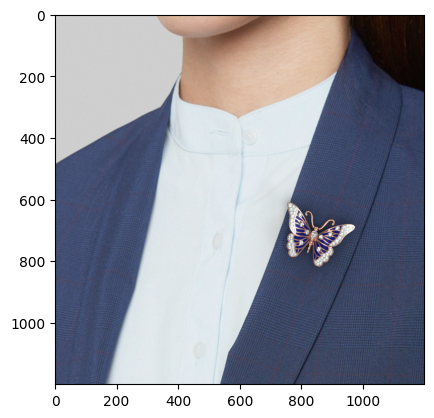

In [25]:
image_index = 0
neighbors = NearestNeighbors(n_neighbors = 3, algorithm = 'brute', metric = 'euclidean').fit(feature_list)
distances, indices = neighbors.kneighbors([test_feature[image_index]])

plt.imshow(mpimg.imread(test_file[image_index]))

In [27]:
# from sklearn import neighbors
# neighbors.VALID_METRICS['brute']

Similar Matches
[46 57 20]


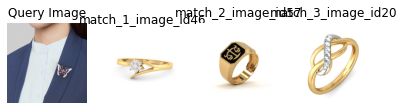

In [26]:
fig = plt.figure(figsize=(10,10))
rows = 2
columns = 6
fig.add_subplot(rows, columns, 1)
plt.imshow(mpimg.imread(test_file[image_index]))
plt.axis('off')
plt.title('Query Image')

print('Similar Matches')
indices = indices.flatten()
print(indices)

for i in range(len(indices)):
  fig.add_subplot(rows, columns, i+2)

  plt.imshow(mpimg.imread(filenames[indices[i]]))
  plt.axis('off')
  plt.title('match_'+str(i+1)+'_image_id'+str(indices[i]))